In [20]:
import pandas as pd
import geopandas
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
montreal = pd.read_csv('./data/montreal.csv')
montreal.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,534948,https://www.airbnb.com/rooms/534948,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,<b>The space</b><br />The apartment is fully e...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1610679,...,5.00,4.83,4.83,NaN,f,1,1,0,0,0.05
1,542160,https://www.airbnb.com/rooms/542160,20230902231108,2023-09-03,city scrape,Condo in Montreal · ★4.77 · 1 bedroom · 1 bed ...,<b>The space</b><br />I am renting my lovely c...,"Le plateau Mont-Royal is in my opinion, the be...",https://a0.muscache.com/pictures/29641965/040b...,2666170,...,4.89,4.68,4.78,"284723, expires: 2024-06-30",f,2,2,0,0,1.70
2,556742,https://www.airbnb.com/rooms/556742,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,The building is occupied by families mostly. T...,"This neighborhood is our favorite, the Avenue ...",https://a0.muscache.com/pictures/9263006/946af...,2737452,...,4.94,4.83,4.80,NaN,f,2,2,0,0,0.94
3,564098,https://www.airbnb.com/rooms/564098,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.80 · 1 bedroom · ...,A bright and sunny upper triplex on a tree-lin...,"Location: On the edge of the Plateau, close to...",https://a0.muscache.com/pictures/7314398/a9b57...,2542265,...,4.82,4.64,4.73,NaN,f,2,2,0,0,0.09
4,29059,https://www.airbnb.com/rooms/29059,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.67 · 1 bedroom · ...,CITQ 267153<br />Lovely studio with 1 closed r...,NaN,https://a0.muscache.com/pictures/736399/fa6c31...,125031,...,4.76,4.81,4.69,"267153, expires: 2024-03-31",f,1,1,0,0,2.71


In [3]:
montreal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7933 entries, 0 to 7932
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7933 non-null   int64  
 1   listing_url                                   7933 non-null   object 
 2   scrape_id                                     7933 non-null   int64  
 3   last_scraped                                  7933 non-null   object 
 4   source                                        7933 non-null   object 
 5   name                                          7933 non-null   object 
 6   description                                   7887 non-null   object 
 7   neighborhood_overview                         4298 non-null   object 
 8   picture_url                                   7933 non-null   object 
 9   host_id                                       7933 non-null   i

## Exploratory data analysis

In [6]:
columns_of_interest = [
    "name",
    "description",
    "listing_url",
    "host_id",
    "host_location",
    "neighbourhood",
    "neighbourhood_cleansed",
    "neighborhood_overview",
    "latitude",
    "longitude",
    "property_type",
    "room_type",
    "beds",
    "amenities",
    "price",
    "minimum_nights",
    "maximum_nights",
    "availability_365",
    "number_of_reviews",
    "review_scores_rating",
]

montreal_df = montreal[columns_of_interest]

montreal_df.head()

,name,description,listing_url,host_id,host_location,neighbourhood,neighbourhood_cleansed,neighborhood_overview,latitude,longitude,property_type,room_type,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating
0,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,<b>The space</b><br />The apartment is fully e...,https://www.airbnb.com/rooms/534948,1610679,"Bissau, Guinea-Bissau",NaN,Le Sud-Ouest,NaN,45.48730,-73.57330,Entire rental unit,Entire home/apt,2.0,"[""Bed linens"", ""Outdoor dining area"", ""Resort ...",$88.00,31,62,56,6,4.83
1,Condo in Montreal · ★4.77 · 1 bedroom · 1 bed ...,<b>The space</b><br />I am renting my lovely c...,https://www.airbnb.com/rooms/542160,2666170,"Montreal, Canada","Montreal, Quebec, Canada",Le Plateau-Mont-Royal,"Le plateau Mont-Royal is in my opinion, the be...",45.53666,-73.58142,Entire condo,Entire home/apt,1.0,"[""Shampoo"", ""Wifi"", ""Oven"", ""Patio or balcony""...",$91.00,31,1125,274,192,4.77
2,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,The building is occupied by families mostly. T...,https://www.airbnb.com/rooms/556742,2737452,"Montreal, Canada","Montreal, Quebec, Canada",Le Plateau-Mont-Royal,"This neighborhood is our favorite, the Avenue ...",45.53090,-73.56854,Entire rental unit,Entire home/apt,2.0,"[""Bed linens"", ""Self check-in"", ""Private entra...",$101.00,31,1125,284,127,4.83
3,Rental unit in Montreal · ★4.80 · 1 bedroom · ...,A bright and sunny upper triplex on a tree-lin...,https://www.airbnb.com/rooms/564098,2542265,"Montreal, Canada","Montreal, Quebec, Canada",Le Plateau-Mont-Royal,"Location: On the edge of the Plateau, close to...",45.53826,-73.57070,Entire rental unit,Entire home/apt,1.0,"[""Bed linens"", ""Outdoor dining area"", ""Wifi"", ...",$50.00,31,1125,140,12,4.80
4,Rental unit in Montreal · ★4.67 · 1 bedroom · ...,CITQ 267153<br />Lovely studio with 1 closed r...,https://www.airbnb.com/rooms/29059,125031,"Montreal, Canada",NaN,Ville-Marie,NaN,45.51939,-73.56482,Entire rental unit,Entire home/apt,2.0,"[""Bed linens"", ""Booster seat high chair - avai...",$190.00,31,60,308,435,4.67


<Axes: xlabel='count', ylabel='beds'>

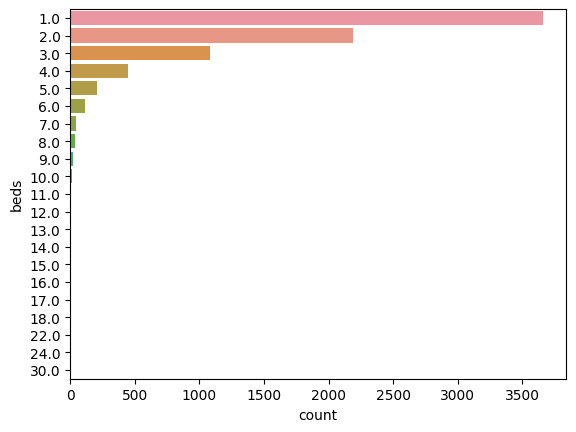

In [18]:
# Beds
sns.countplot(y='beds', data=montreal_df)

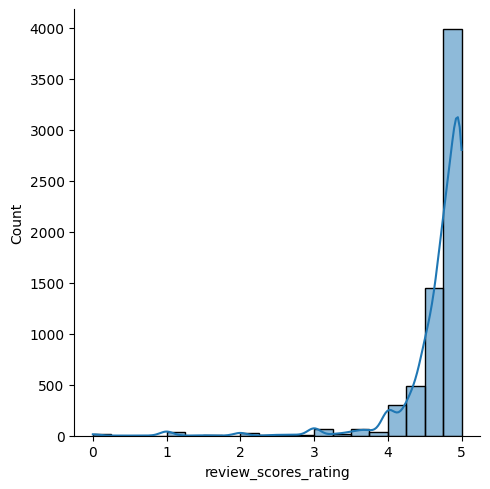

In [19]:
# Average review rating
sns.displot(montreal_df['review_scores_rating'], bins=20, kde=True)

In [22]:
# Plot latitude and longitude of listings using Folium
geometry = geopandas.points_from_xy(montreal_df.longitude, montreal_df.latitude)
crs = {'init': 'epsg:4326'}
montreal_gdf = geopandas.GeoDataFrame(montreal_df, crs=crs, geometry=geometry)

map = folium.Map(location=[45.5017, -73.5673], zoom_start=12, tiles="OpenStreetMap")
map


       id                          listing_url       scrape_id last_scraped  \
0   17891   https://www.airbnb.com/rooms/17891  20230917033803   2023-09-17   
1   72571   https://www.airbnb.com/rooms/72571  20230917033803   2023-09-17   
2  103760  https://www.airbnb.com/rooms/103760  20230917033803   2023-09-17   
3  104626  https://www.airbnb.com/rooms/104626  20230917033803   2023-09-17   
4  132773  https://www.airbnb.com/rooms/132773  20230917033803   2023-09-17   

            source                                               name  \
0  previous scrape  Rental unit in Hong Kong Island · ★4.76 · Stud...   
1      city scrape  Rental unit in Sheung Wan · ★4.22 · Studio · 1...   
2      city scrape  Rental unit in Central · ★4.46 · 2 bedrooms · ...   
3      city scrape  Rental unit in Hong Kong · ★4.38 · 1 bedroom ·...   
4      city scrape  Rental unit in Hong Kong Island · ★4.50 · 2 be...   

                                         description  \
0  Gorgeous and spacious loft,

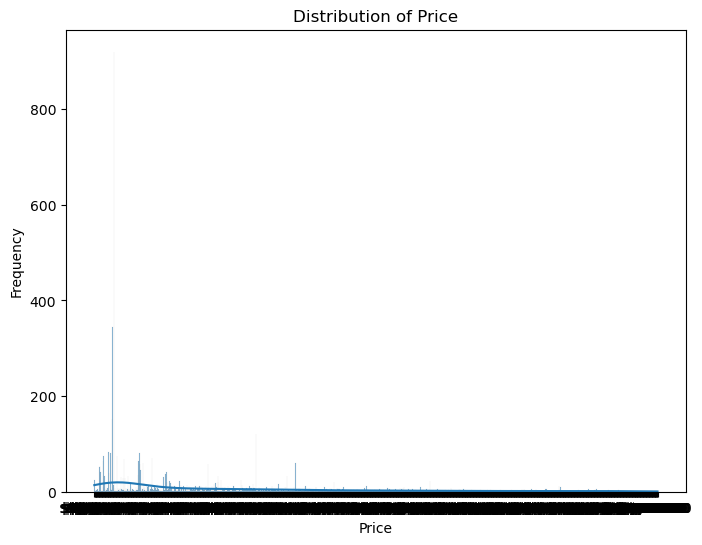

/var/folders/mn/02zvw24x29v3xxdzdmx604fc0000gn/T/ipykernel_11088/2715941551.py:43: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


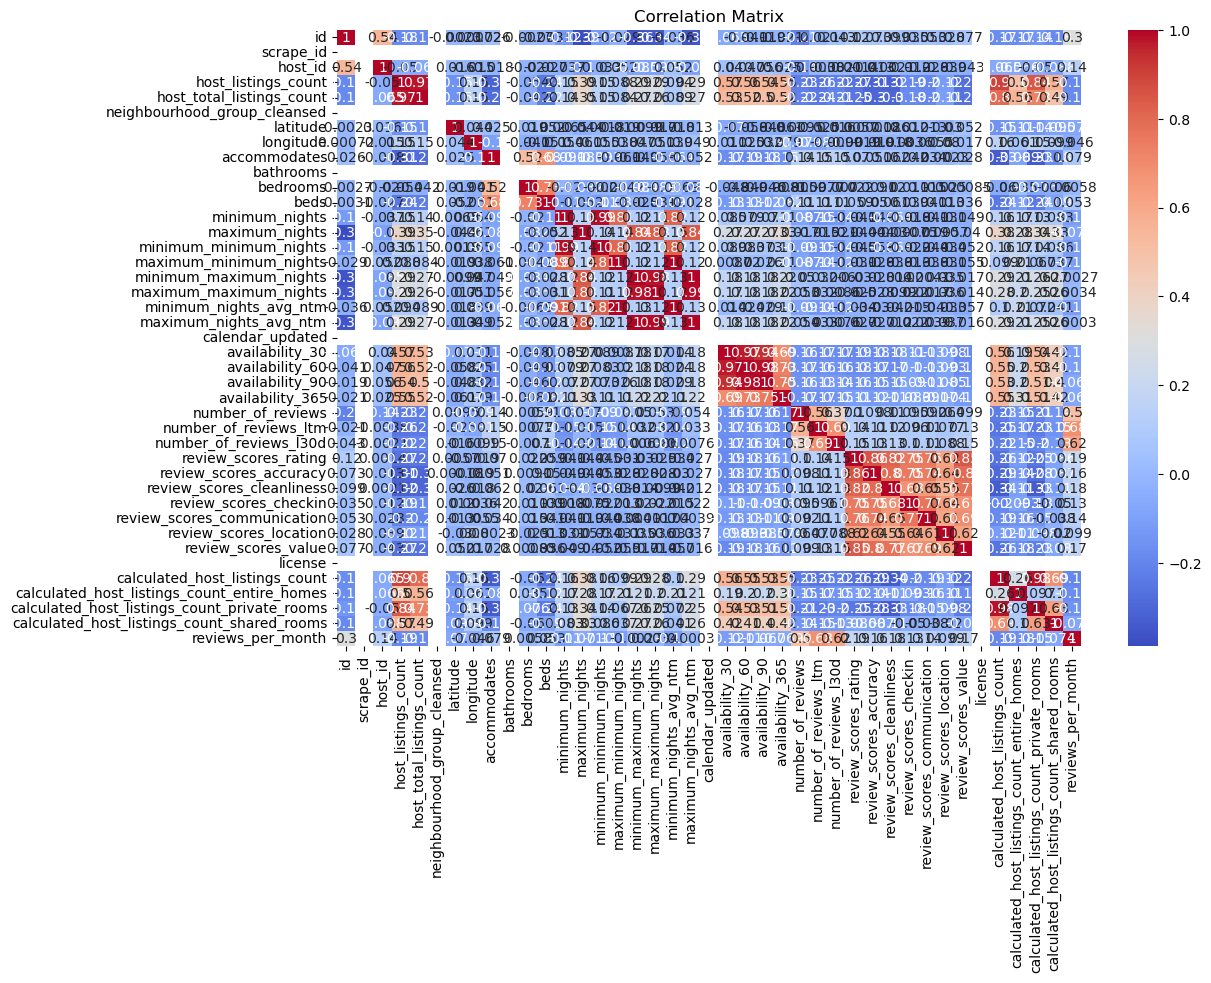

/var/folders/mn/02zvw24x29v3xxdzdmx604fc0000gn/T/ipykernel_11088/2715941551.py:62: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  selected_data['price'] = selected_data['price'].str.replace(',', '').str.replace('$', '').astype(float)


                  Feature        VIF
0            accommodates   3.759421
1       host_is_superhost   1.289837
2    review_scores_rating  11.557365
3         availability_30   2.095526
4               bathrooms   8.325588
5    room_type_Hotel room   1.073545
6  room_type_Private room   2.416356
7   room_type_Shared room   1.420950
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     198.3
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          8.73e-254
Time:                        22:29:55   Log-Likelihood:                -16107.
No. Observations:                2244   AIC:                         3.223e+04
Df Residuals:                    2235   BIC:                         3.228e+04
Df Model:                          

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Load the dataset
data = pd.read_csv('/Users/rohankumar/Desktop/McGill/INSY-662 Data min & visualization/Project/dataset.csv')

# ---------------- Exploratory Data Analysis (EDA) ------------------

# Display the first few rows of the dataset
print(data.head())

# Check the data types and missing values
print(data.info())

# Descriptive statistics
print(data.describe())

# Visualize distribution of 'price'
plt.figure(figsize=(8,6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Check correlations
correlation_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ---------------- Data Preprocessing ------------------

# Select relevant features
selected_features = [
    'room_type', 'accommodates', 'bathrooms_text',
    'host_is_superhost', 'review_scores_rating', 'availability_30', 'price'
]
selected_data = data[selected_features]

# Drop all observations with missing values
selected_data = selected_data.dropna()

# Convert 'price' column to numeric format
selected_data['price'] = selected_data['price'].str.replace(',', '').str.replace('$', '').astype(float)

# Data Cleaning
selected_data['bathrooms'] = selected_data['bathrooms_text'].str.extract('(\d+\.?\d?)').astype(float)
selected_data.drop(columns=['bathrooms_text'], inplace=True)
selected_data['host_is_superhost'] = selected_data['host_is_superhost'].replace({'t': 1, 'f': 0})

# One-hot encoding for 'room_type'
selected_data = pd.get_dummies(selected_data, columns=['room_type'], drop_first=True)

# Remove outliers using IQR method
Q1 = selected_data[['price', 'review_scores_rating', 'availability_30']].quantile(0.25)
Q3 = selected_data[['price', 'review_scores_rating', 'availability_30']].quantile(0.75)
IQR = Q3 - Q1
cleaned_data = selected_data[~((selected_data[['price', 'review_scores_rating', 'availability_30']] < (Q1 - 1.5 * IQR)) | 
                              (selected_data[['price', 'review_scores_rating', 'availability_30']] > (Q3 + 1.5 * IQR))).any(axis=1)]

cleaned_data = cleaned_data.dropna()

# Split the data into training and testing sets
X = cleaned_data.drop('price', axis=1)
y = cleaned_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Display VIF for each feature
print(vif_data)

# ---------------- Model Training and Evaluation using Linear Regression ------------------

# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# You may need to add a constant term for the intercept
X_i = sm.add_constant(X_train)

# Fit a linear regression model using OLS
model = sm.OLS(y_train, X_i).fit()

# View the summary of the model
print(model.summary())

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Below are the results of the linear regression model:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Value: {r2}")

# ---------------- Model Training and Evaluation using Ridge Regression ------------------

# Train a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mae_r = mean_absolute_error(y_test, y_pred)
mse_r = mean_squared_error(y_test, y_pred)
rmse_r = mean_squared_error(y_test, y_pred, squared=False)
r2_r = r2_score(y_test, y_pred)

print("Below are the results from the Ridge Regression Model:")
print(f"Mean Absolute Error (MAE): {mae_r}")
print(f"Mean Squared Error (MSE): {mse_r}")
print(f"Root Mean Squared Error (RMSE): {rmse_r}")
print(f"R-squared Value: {r2_r}")

# ---------------- Model Training and Evaluation using Lasso Regression ------------------

# Train a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter as needed
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mae_l = mean_absolute_error(y_test, y_pred)
mse_l = mean_squared_error(y_test, y_pred)
rmse_l = mean_squared_error(y_test, y_pred, squared=False)
r2_l = r2_score(y_test, y_pred)

print("Below are the results from the Lasso Regression Model:")
print(f"Mean Absolute Error (MAE): {mae_l}")
print(f"Mean Squared Error (MSE): {mse_l}")
print(f"Root Mean Squared Error (RMSE): {rmse_l}")
print(f"R-squared Value: {r2_l}")

# ---------------- Model Training and Evaluation using Random Forest ------------------

# Train a Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
r2_rf = r2_score(y_test, y_pred)

print("Below are the results from the Random Forest Model:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared Value: {r2_rf}")


# Define hyperparameters and their possible values for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}
model = RandomForestClassifier(random_state = 42)

from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters and their distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV with the RandomForestRegressor
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters from the Random Search
print(random_search.best_params_)

# Use the best estimator for predictions and evaluations
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model (you can use the evaluation code you already have)
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
r2_rf = r2_score(y_test, y_pred)

print("Below are the results from the Random Forest Model with Random Search:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared Value: {r2_rf}")
